In [1]:
import numpy as np
import pandas as pd

In [2]:
# Exécute cette cellule si tu souhaite générer un nouveau dataset 
#
#from createDataset import generateDataset

#dataset = generateDataset()
#dataset.to_excel("pipos datasets.xls")

In [3]:
data = pd.read_excel("pipos datasets.xls")
data = data.drop("Unnamed: 0", axis=1)
data.head()

,Spécalités,Informatique 1,Electromagnétisme 1,Mécanique 1,Elément de chimie,Trvaux pratiques de physique 1,Algèbre générale,Analyse réelle 1,Technologies et sciences des matériaux,Electromagnétisme 2,...,Trvaux pratiues de physique 2,Séries et intégrales,"Algèbre multilinéaire, courbes et surfaces",Circuits électriques et électrocinétique,Optique géométrique,Thermodynamique,Statique,Informatique 4,Analyse dans les espaces vectoriels de dimensions finies,Analyse numérique
0,Génie Civile,12,12,18,13,14,17,19,19,13,...,12,15,17,11,13,14,19,13,18,16
1,Génie Civile,12,13,15,13,13,18,16,16,13,...,14,18,17,11,12,13,19,13,15,16
2,Génie Civile,13,14,17,14,13,18,17,15,13,...,14,19,16,11,14,16,15,13,17,17
3,Génie Civile,13,14,16,14,14,19,17,19,14,...,13,17,18,11,12,15,15,12,18,19
4,Génie Civile,13,13,16,12,13,15,16,19,13,...,12,15,17,11,13,15,18,14,19,16


In [4]:
data = data.dropna(axis=0)
X = data.drop("Spécalités", axis=1)
y = data["Spécalités"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
print("X_train:",X_train.shape)
print("X_test:", X_test.shape)
y_test.value_counts()

X_train: (354, 27)
X_test: (89, 27)


Génie Civile                     34
Génie Informatique               30
Génie Electrique et Télécom      14
Génie Industriel et Mécanique    11
Name: Spécalités, dtype: int64

In [7]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=0)

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

    return model

[[34  0  0  0]
 [ 0 14  0  0]
 [ 0  0 11  0]
 [ 0  0  0 30]]
                               precision    recall  f1-score   support

                 Génie Civile       1.00      1.00      1.00        34
  Génie Electrique et Télécom       1.00      1.00      1.00        14
Génie Industriel et Mécanique       1.00      1.00      1.00        11
           Génie Informatique       1.00      1.00      1.00        30

                     accuracy                           1.00        89
                    macro avg       1.00      1.00      1.00        89
                 weighted avg       1.00      1.00      1.00        89



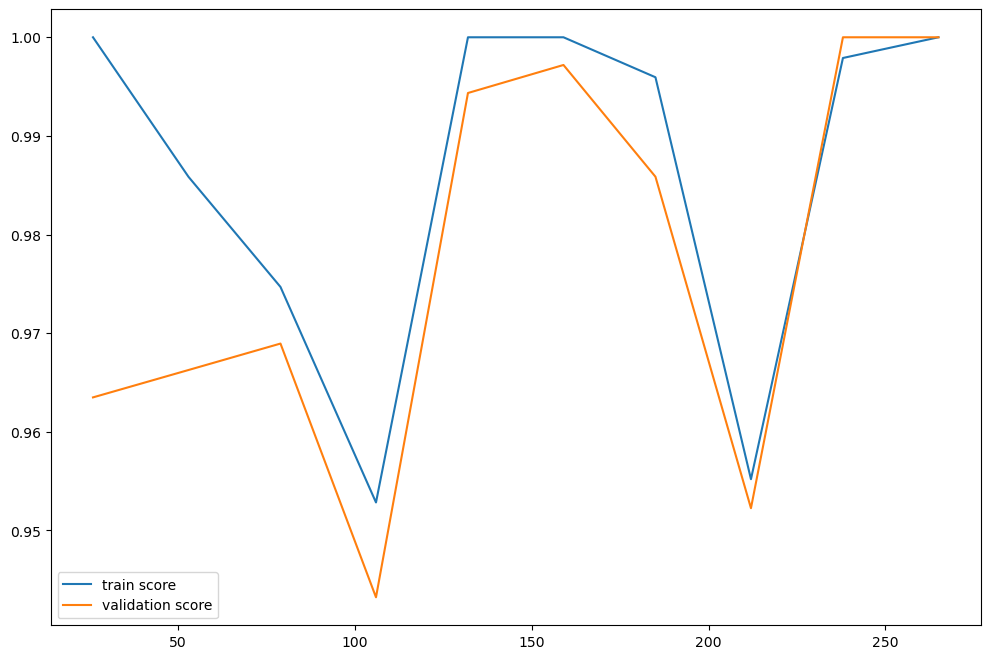

In [9]:
model = evaluation(model)

In [10]:
# Un test avec les notes d'un étudiant entrées au hasard
test = [12, 13, 11, 12, 13, 13, 11, 14.5, 13, 13, 15, 13, 13, 14, 16, 11, 10, 13, 12, 19, 14, 11, 11, 16, 11, 15, 10]
test = np.array(test, dtype='float32')
test = test.reshape((1, test.shape[0]))
test.shape

(1, 27)

In [11]:
model.predict(test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['Génie Informatique'], dtype='<U29')

In [12]:
X_test.shape

(89, 27)

## NB: Ici je te montres une nouvelle facon de raisonner pour resoudre ton probleme: approche par reseau de neurone (Architecture perceptron multicouche)

In [13]:
# A tenir compte lors de la resolution de ton problement
# 1. Quand on bosse sur un projet de machine learning, il est important de bien circonscrire le probleme
# 2. Tu as entrainer un modele sans normaliser tes donnees
# 3. Les courbes d'apprentissages te disent qu'effectivement la tendance a generaliser sur les donnees de test n'est pas bonne
# 4. Il existe plusieurs modele de machine learning, es-tu sur de l'adequation du modele choisit relativement a ton pb?
# 5. Quel est ta fonction d'erreur que tu cherchent a obtimiser?
# 6. Quel est l'algorithme d'optimisation que tu utilise pour resoudre ton probleme?
# 7. Il faut bien definir les objectifs 
# 5. Ici je te montres un peu comment les choses fonctionnes

In [14]:
# Data
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

data = pd.read_excel("pipos datasets.xls")
data = data.drop("Unnamed: 0", axis=1)
X = np.array(data.drop("Spécalités", axis=1))
y = np.array(data["Spécalités"])
transformer = LabelEncoder()
y = transformer.fit_transform(y)

X = (X - X.mean()) / X.std()
print(X.shape)
print(y.shape)

ModuleNotFoundError: No module named 'tensorflow'

In [15]:
y # Ici on a les differentes classes qui se trouve dans le vecteur y

0                       Génie Civile
1                       Génie Civile
2                       Génie Civile
3                       Génie Civile
4                       Génie Civile
                   ...              
438    Génie Industriel et Mécanique
439    Génie Industriel et Mécanique
440    Génie Industriel et Mécanique
441    Génie Industriel et Mécanique
442    Génie Industriel et Mécanique
Name: Spécalités, Length: 443, dtype: object

In [16]:
# Donnees d'entrainement et donnees de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print("X_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (354, 27)
y_train shape: (354,)
X_test shape: (89, 27)
y_test shape: (89,)


In [17]:
model = keras.models.Sequential([
    keras.layers.Input((27,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()


NameError: name 'keras' is not defined

In [18]:
# Entrainement du modele
resulats = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test))

TypeError: fit() got an unexpected keyword argument 'epochs'

In [19]:
train_loss = resulats.history["loss"]
val_loss = resulats.history["val_loss"]
train_acc = resulats.history["accuracy"]
val_acc = resulats.history["val_accuracy"]

# Courbes d'apprentissage et de performance du modele
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(train_loss, c='b',label='train_loss')
plt.plot(val_loss, c='r', label='val_loss')
plt.xlabel("n_epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(train_acc, c='b',label='train_acc')
plt.plot(val_acc, c='r', label='val_acc')
plt.xlabel("n_epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

NameError: name 'resulats' is not defined

In [20]:
# Phase predictive
x_pred = X[0]
print(x_pred.shape)
x_pred

KeyError: 0